### =====================================================================
### IMPORTACIÓN GENERAL DE LA INFORMACIÓN.
### =====================================================================

In [47]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
import descartes
import geopandas as gpd
import json
import requests
import geocoder

from sklearn.ensemble import RandomForestRegressor
from shapely.geometry import Point, Polygon
from urllib2 import urlopen

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

### =====================================================================
### ALGORITMOS DE MACHINE LEARNING:
### =====================================================================

In [48]:
# LECTURAS DE CSV YA PROCESADOS. 
train = pd.read_csv('DATA/train_procesado.csv') # trainProcesado_precio_v2.csv # train.csv
test = pd.read_csv('DATA/test_procesado.csv') # testProcesado_v2.csv # test.csv

In [49]:
Identificador = pd.DataFrame()
Identificador['id'] = test['id']

In [50]:
train = train.drop('id', axis = 1)
test = test.drop('id', axis = 1)

#train = train.drop('mean', axis = 1)
#test = test.drop('mean', axis = 1)

#train = train.drop('median', axis = 1)
#test = test.drop('median', axis = 1)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 72 columns):
habitaciones                  240000 non-null int64
garages                       240000 non-null int64
banos                         240000 non-null int64
gimnasio                      240000 non-null int64
usosmultiples                 240000 non-null int64
piscina                       240000 non-null int64
escuelascercanas              240000 non-null int64
centroscomercialescercanos    240000 non-null int64
2012                          240000 non-null int64
2013                          240000 non-null int64
2014                          240000 non-null int64
2015                          240000 non-null int64
2016                          240000 non-null int64
precio                        240000 non-null float64
ciudad                        240000 non-null int64
provincia                     240000 non-null int64
tipodepropiedad               240000 non-null int64
ant

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 71 columns):
habitaciones                  60000 non-null int64
garages                       60000 non-null int64
banos                         60000 non-null int64
gimnasio                      60000 non-null int64
usosmultiples                 60000 non-null int64
piscina                       60000 non-null int64
escuelascercanas              60000 non-null int64
centroscomercialescercanos    60000 non-null int64
2012                          60000 non-null int64
2013                          60000 non-null int64
2014                          60000 non-null int64
2015                          60000 non-null int64
2016                          60000 non-null int64
ciudad                        60000 non-null int64
provincia                     60000 non-null int64
tipodepropiedad               60000 non-null int64
antiguedad_agrupada           60000 non-null int64
metroscubiertos_agrupada

### =====================================================================
### RANDOM FOREST.
### =====================================================================

In [53]:
# Segmentamos una parte para entrenar y constatar.
train_2016 = train.loc[train['2016'] == 1]
train_PREV = train.loc[train['2016'] == 0]

In [54]:
# Label a predecir.
labels_2016 = np.array(train_2016['precio'])
labels_PREV = np.array(train_PREV['precio'])

In [55]:
# Resto de los labels.
train_2016 = train_2016.drop('precio', axis = 1)
train_PREV = train_PREV.drop('precio', axis = 1)
#train_2016 = train_2016.drop('anio', axis = 1)
#train_PREV = train_PREV.drop('anio', axis = 1)
#test = test.drop('anio', axis = 1)

In [56]:
# Lista de columnas.
feature_list = list(train_PREV.columns)

In [57]:
# Numpy array
train_2016 = np.array(train_2016)
train_PREV = np.array(train_PREV)

In [58]:
# Observamos lo que nos queda en cada parte.
print('Training Features Shape:', train_PREV.shape)
print('Training Labels Shape:', labels_PREV.shape)
print('Testing Features Shape:', train_2016.shape)
print('Testing Labels Shape:', labels_2016.shape)

('Training Features Shape:', (145962, 71))
('Training Labels Shape:', (145962,))
('Testing Features Shape:', (94038, 71))
('Testing Labels Shape:', (94038,))


In [59]:
# Armamos el regresor con parámetros por defecto.
rf = RandomForestRegressor(n_estimators = 300, random_state = 150)
# Entrenamos.
rf.fit(train_PREV, labels_PREV);

In [60]:
# Hacemos una predicción.
predictions = rf.predict(train_2016)
# Calculamos el error absoluto.
errors = abs(predictions - labels_2016)
# Imprimimos el error.
print('Error:', round(np.mean(errors), 2), 'grados.')

('Error:', 508028.44, 'grados.')


In [61]:
# Calculamos el porcentaje de error.
mape = 100 * (errors / labels_2016)
# Calculate la precisión.
accuracy = 100 - np.mean(mape)
print('Precision:', round(accuracy, 2), '%.')

('Precision:', 81.22, '%.')


In [62]:
prediccion = rf.predict(test)

In [63]:
train = train.drop('precio', axis = 1)

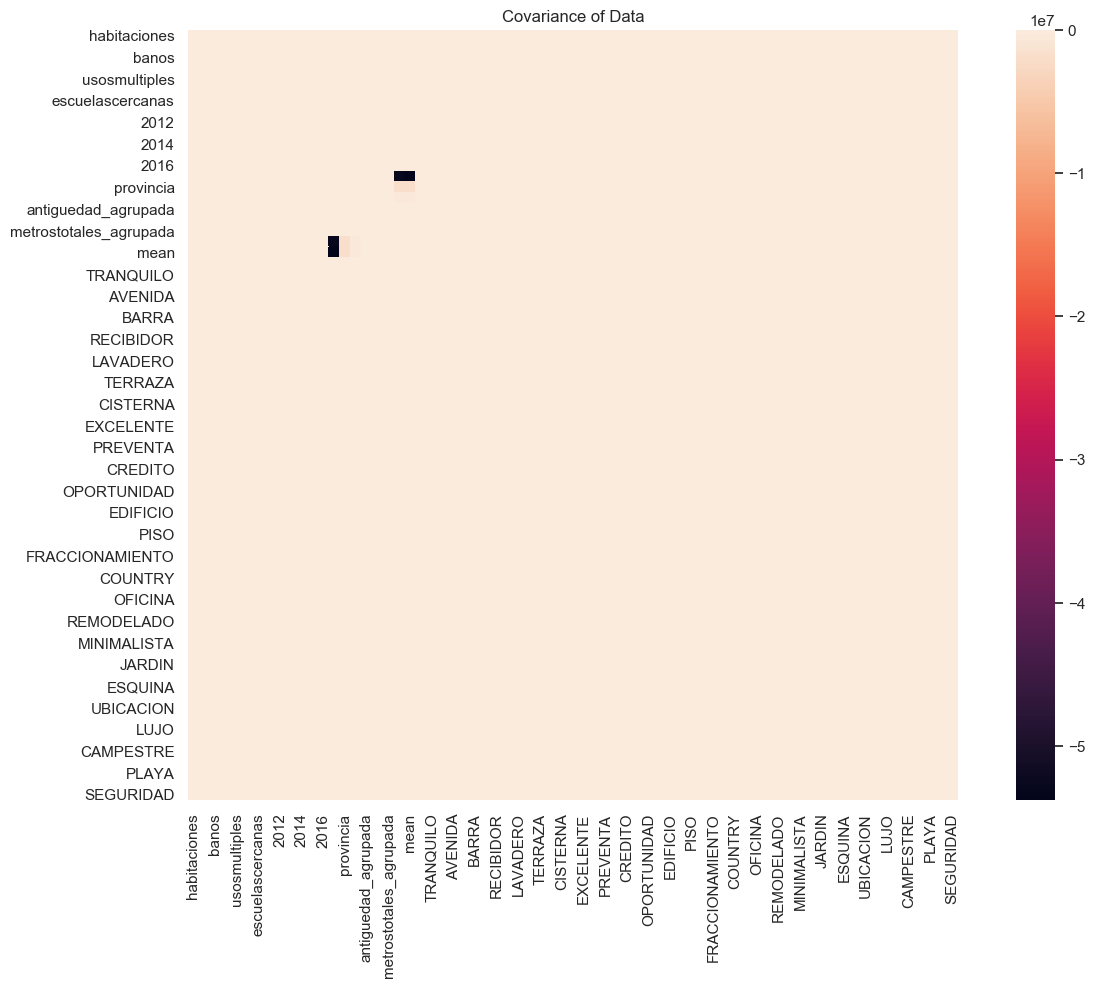

In [64]:
data_covariance = train.cov()
sns.heatmap(data_covariance, vmax=.8, square=True)
plt.title("Covariance of Data")
plt.show()

In [65]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = train.columns, columns=['importance']).sort_values('importance',ascending=False)

In [66]:
feature_importances

,importance
mean,0.752141
metroscubiertos_agrupada,0.062734
median,0.025575
tipodepropiedad,0.018895
provincia,0.016114
metrostotales_agrupada,0.016008
ciudad,0.012582
garages,0.008174
banos,0.008061
antiguedad_agrupada,0.006759


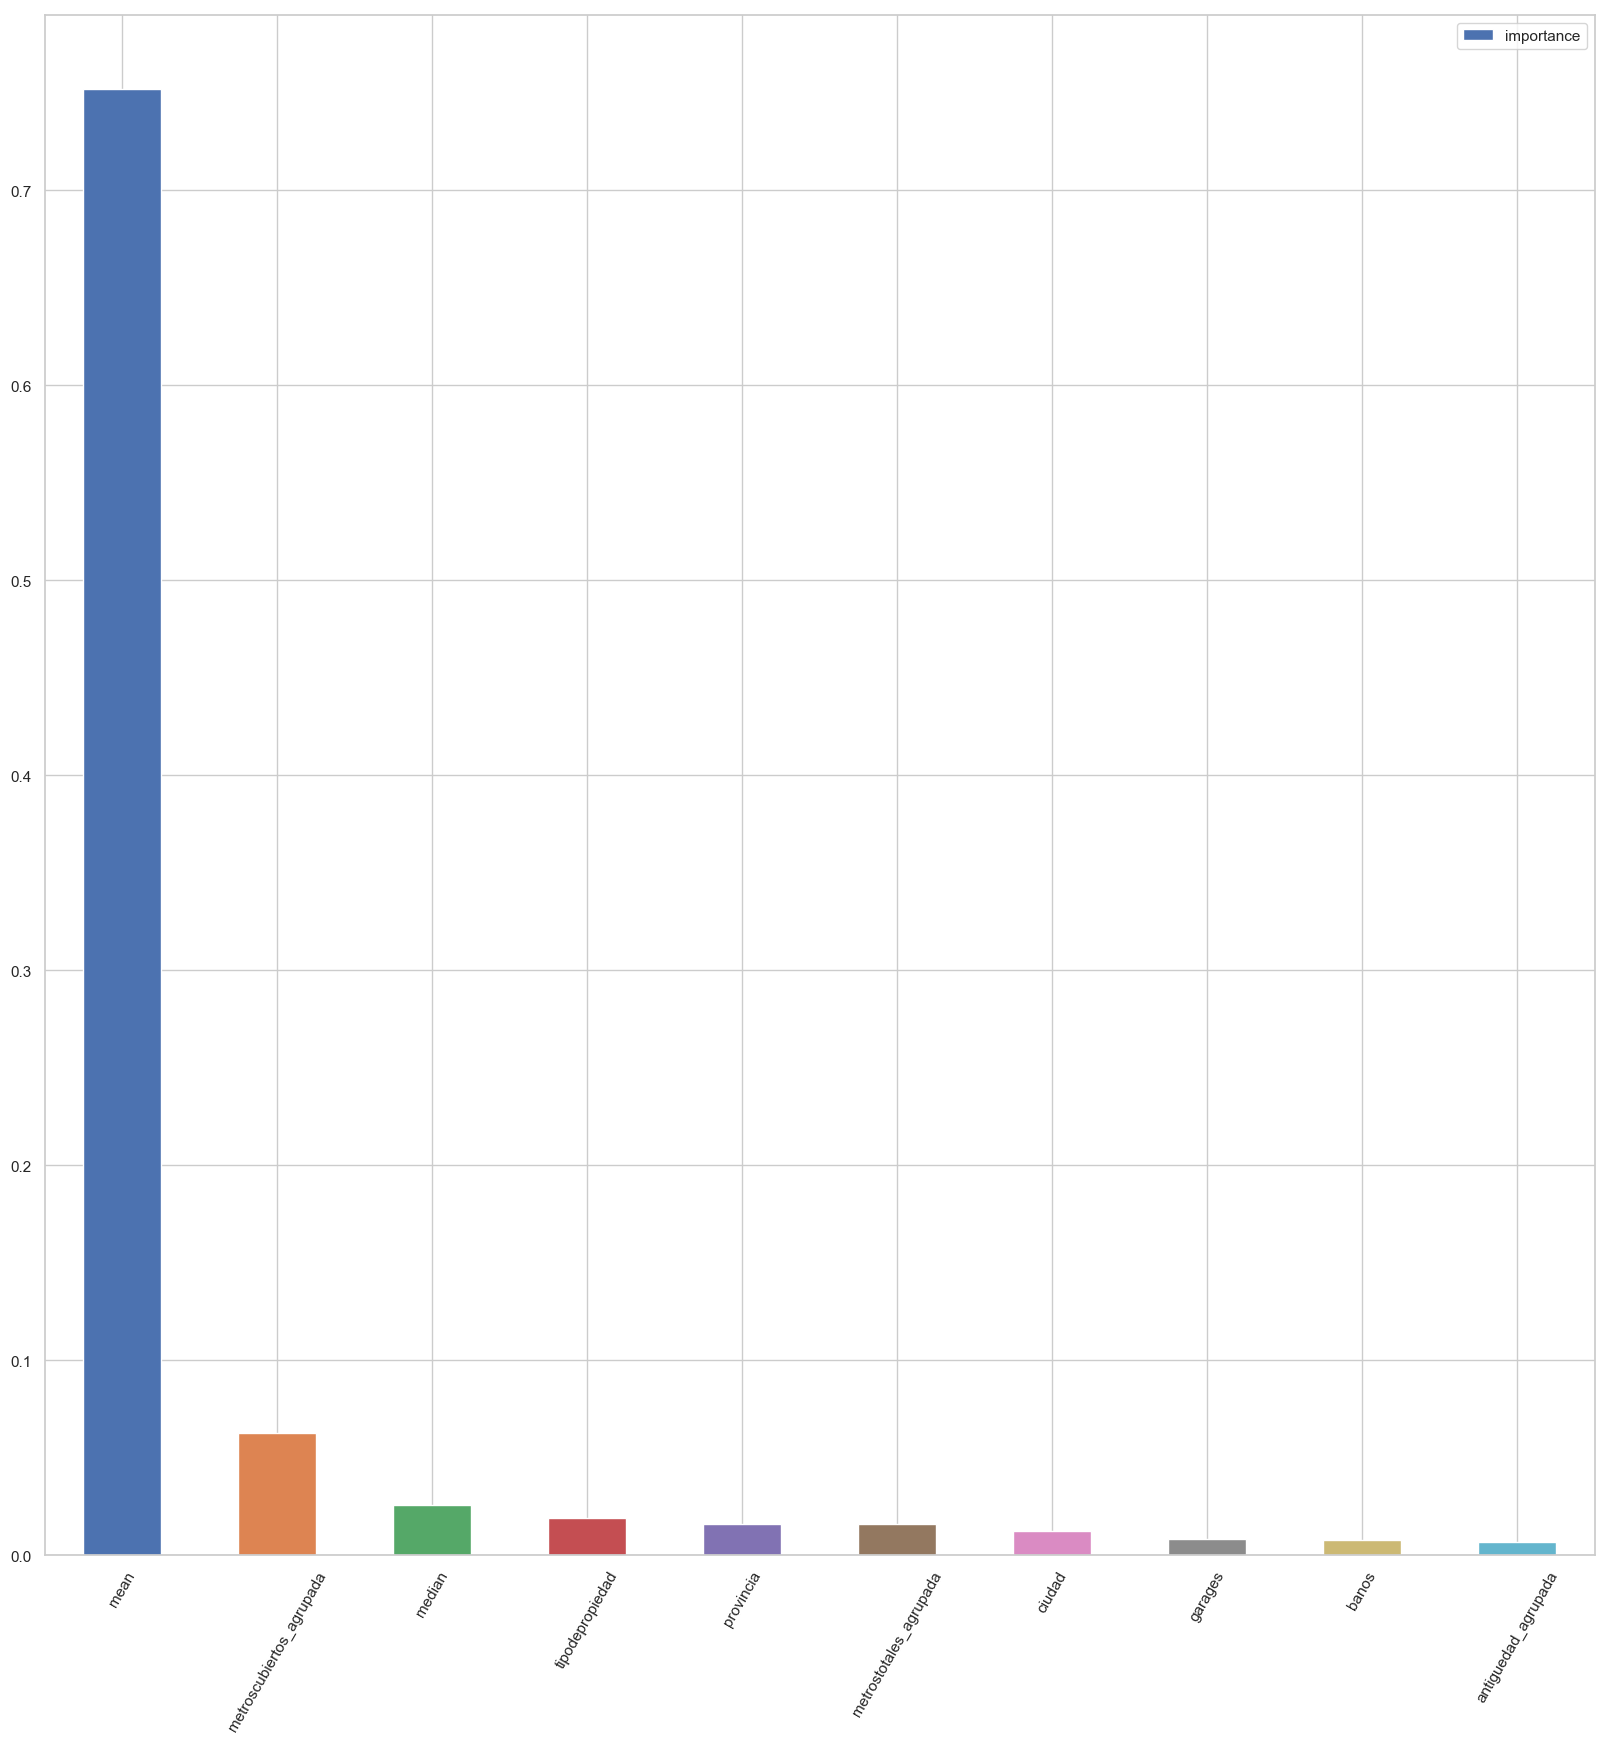

In [67]:
ax = feature_importances.head(10).plot.bar(y='importance', rot=60, figsize=(20,20))

In [44]:
## =================================================================================================
## ARMAMOS EN BASE A LA PREDICCIÓN QUE TENEMOS UN CSV PARA SUBIR A KAGGLE CON EL FORMATO INDICADO!
## =================================================================================================
submission = pd.DataFrame({ 'id': Identificador['id'], 'target': prediccion })
submission.to_csv("SUBMITS/010_G34_RandomForest.csv", index=False)